# Лабораторная работа №0

## Анализ данных звезд

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Считываем таблицу с данными:

In [2]:
A = pd.read_csv('stars.csv', engine='python', sep=',')
Table = A

Посмотрим на её размер, вид, определим имена и порядок колонок:

In [3]:
Table

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


У нас есть 7 колонок и 240 строк данных. 

Столбцы по порядку: температура звезды, светимоть, радиус, звездная величина, тип звезды, цвет звезды и её класс.

In [4]:
def Plot3D(x, y, c = 6, f = lambda x : x):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()

    for a, b in [(i, i) for i in (c if type(c) is list else range(c))]:
        S = Table[(Table['Star type'] <= b) & (Table['Star type'] >= a)]
        ax.scatter(S[x], f(S[y]), label=f"{a}")
        
    plt.legend(loc='upper right')
    plt.show()

Провизуализируем зависимость температуры звезды и её светимость:

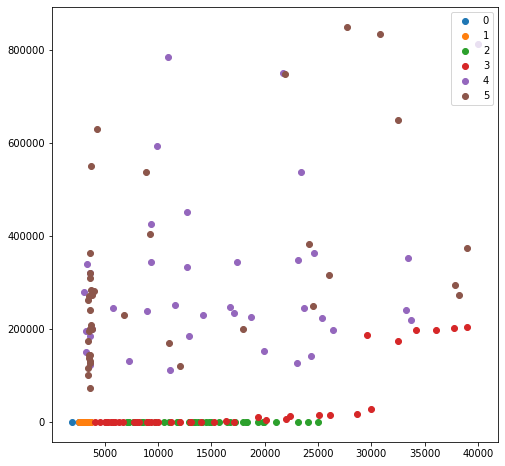

In [5]:
Plot3D('Temperature (K)', 'Luminosity(L/Lo)')

Во-первых, можем подметить, что никакой явно выраженной зависимости нет. 

Однако из интересного можем подметить, что 4 и 5 классы имеют очень большую светимость, в отличие от остальных. Попробуем посмотреть поближе на классы 0 - 2.

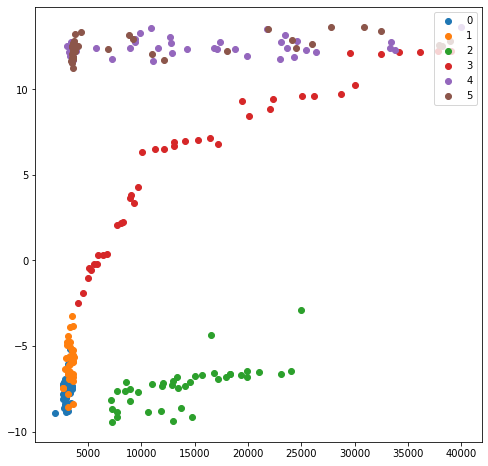

In [8]:
Plot3D('Temperature (K)', 'Luminosity(L/Lo)', 6, f = lambda x : np.log(x))

Видим, что классы 0-1 сильно отделены от класса 2 по температурному признаку.

Теперь посмотрим на график зависимости звездной величины от температуры:

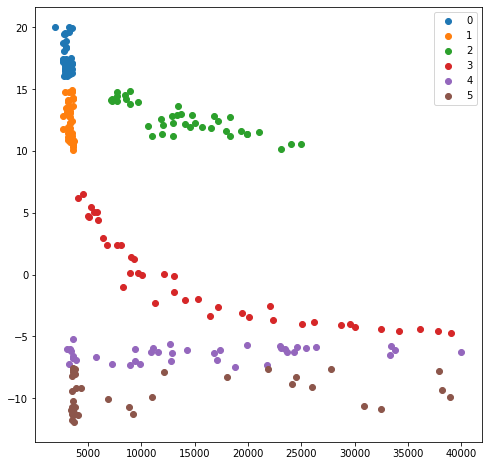

In [7]:
Plot3D('Temperature (K)', 'Absolute magnitude(Mv)')

Очень интересный график. 0, 1 и 3 классы образуют какую-то экспоненту. Второй класс больше вытянут вдоль прямой. 4 и 5 классы больше сосредоточились при температуре до 5000K, однако есть и те, что горячее. Точно для классов 4-5 можно лишь определить максимум зведной величины - в районе -5.

На данном графике все классы очень хорошо выделены, поэтому для параметров температуры и звездной величины можно легко классифицировать звезды.

Посмотрим на график зависимости логарифма радиуса звезды от температуры:

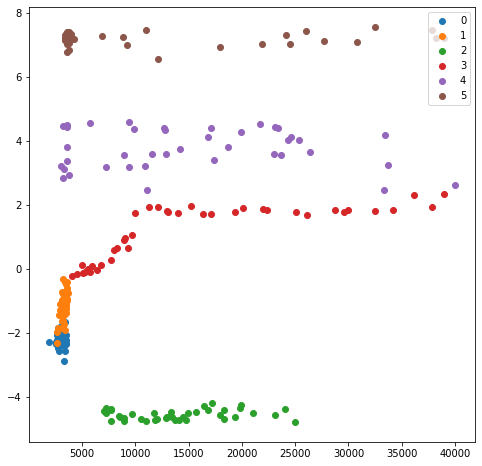

In [8]:
Plot3D('Temperature (K)', 'Radius(R/Ro)', f = lambda x : np.log(x))

Здесь тоже очень легко классифицировать звезды. Между классами можно построить горизонтальные разделяющие, которые в итоге образуют разбиение плоскости на полосы, внутри каждой из которых будет лежать отдельный класс.

Заменим радиус на логарифм радиуса, и также сделаем для светимости + уберем ненужные величины.

In [9]:
Table = Table[['Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Luminosity(L/Lo)', 'Star type']]
Table = Table.apply(lambda x : np.log(x) if x.name == 'Radius(R/Ro)' else x)
Table = Table.apply(lambda x : np.log(x) if x.name == 'Luminosity(L/Lo)' else x)
Table.head()

,Radius(R/Ro),Absolute magnitude(Mv),Luminosity(L/Lo),Star type
0,-1.771957,16.12,-6.032287,0
1,-1.869505,16.60,-7.600902,0
2,-2.282782,18.70,-8.111728,0
3,-1.832581,16.65,-8.517193,0
4,-2.273026,20.06,-8.888257,0


Посмотрим на корреляционную матрицу для признаков из таблицы:

<AxesSubplot:>

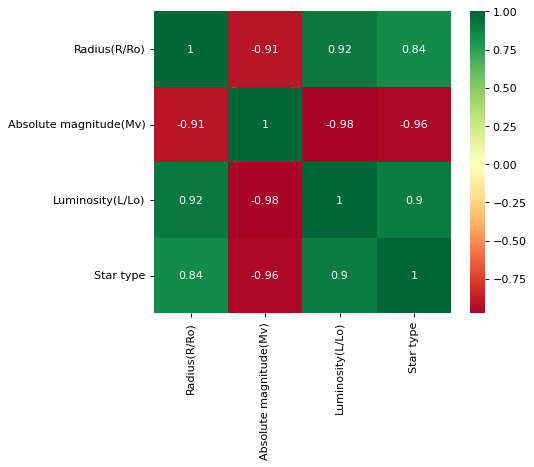

In [10]:
plt.figure(figsize=(6, 5), dpi= 80)
sns.heatmap(Table.corr(), xticklabels=Table.corr().columns, 
                          yticklabels=Table.corr().columns, 
                          cmap='RdYlGn', center=0, annot=True)

Сделав вышеуказанные преобразования видим, что все три признака коррелируют друг с другом.

Гистограммы распределения звезд по логарифму радиуса:

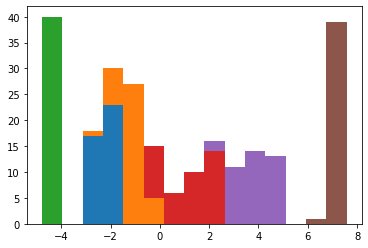

In [11]:
plt.hist([Table[Table['Star type'] == i]['Radius(R/Ro)'] for i in range(6)], 15, stacked=True, fill=True)
plt.show()

Можно примерно выделить диапозоны, куда объекты определенных классов входят чаще всего.

Еще одна гистограмма, хорошо показывающая легкость классификации звезд по звездной величине:

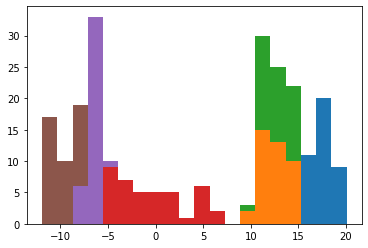

In [12]:
plt.hist([Table[Table['Star type'] == i]['Absolute magnitude(Mv)'] for i in range(6)], 20, stacked=True, fill=True)
plt.show()

Тут проблемы могут возникать только с 1 и 2 классами, что мы уже прослеживали ранее

Построим график зависимости логарифма радиуса от звездной величины

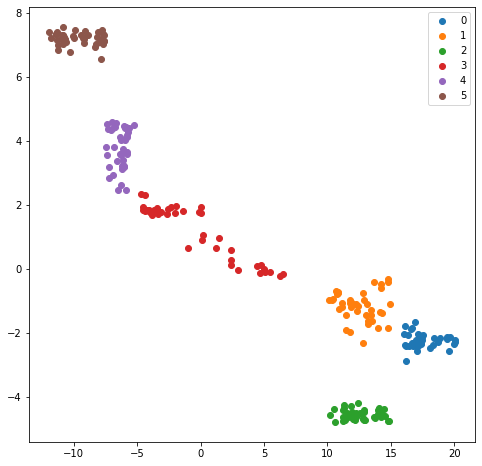

In [13]:
Plot3D('Absolute magnitude(Mv)', 'Radius(R/Ro)')

Видим, что разделить классы теперь совсем не составит труда.